In [237]:
import glob
import numpy as np
import os.path as path
from scipy import misc

In [238]:
IMAGE_PATH = 'train'
file_paths = glob.glob(path.join(IMAGE_PATH, '*c.png'))

In [239]:
images = [misc.imread(path) for path in file_paths]
images = np.asarray(images)

C:\Users\JLipemelton\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


In [240]:
image_size = np.asarray([images.shape[1], images.shape[2], images.shape[3]])
print(images.shape)
print(image_size)

(988, 128, 118, 4)
[128 118   4]


In [241]:
images = images / 255

In [242]:
n_images = int(images.shape[0])
labels = np.zeros(n_images+1)
import csv
with open('train_labels.csv', newline='') as labelcsv:
    spamreader = csv.reader(labelcsv, delimiter=' ')
    i = 0
    for row in spamreader:
        #print(row[0][5:])
        if i != 0:
            labels[i] = int(row[0][5:])
        i+=1
labels = labels[1:]
labels = labels.astype(int)
assert(labels.size == images.shape[0])
#labels

[1, 5, 29, 31, 41, 55, 57, 66, 73, 77]

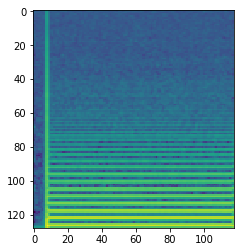

In [243]:
import matplotlib.pyplot as plt
plt.imshow(images[10])
ones = []
for i in range(len(labels)):
    if labels[i] == 1:
        ones.append(i)
ones[:10]

In [244]:
# Split into test and training sets
TRAIN_TEST_SPLIT = 0.9

# Split at the given index
split_index = int(TRAIN_TEST_SPLIT * n_images)
shuffled_indices = np.random.permutation(n_images)
train_indices = shuffled_indices[0:split_index]
test_indices = shuffled_indices[split_index:]

# Split the images and the labels
x_train = images[train_indices, :, :]
y_train = labels[train_indices]
x_test = images[test_indices, :, :]
y_test = labels[test_indices]



#split_index = int(TRAIN_TEST_SPLIT * n_images)
#x_train = images[split_index, :, :]
#y_train = labels[split_index]
#x_test = images[split_index, :, :]
#y_test = labels[split_index]

In [245]:
# Imports
import keras
import tensorflow as tf
from datetime import datetime

In [247]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=5, padding="same", activation="relu"),
    keras.layers.AveragePooling2D(pool_size=3),
    keras.layers.Conv2D(filters=64, kernel_size=5, padding="same", activation="relu"),
    keras.layers.MaxPooling2D(pool_size=3),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(rate=.8),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(11, activation=tf.nn.softmax)
])
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100)
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

Epoch 1/100
889/889 [==============================] - 59s 66ms/step - loss: 2.3263 - acc: 0.1395
Epoch 2/100
889/889 [==============================] - 57s 64ms/step - loss: 2.1551 - acc: 0.2272
Epoch 3/100
889/889 [==============================] - 56s 63ms/step - loss: 1.9767 - acc: 0.2925
Epoch 4/100
889/889 [==============================] - 54s 61ms/step - loss: 1.8250 - acc: 0.3487
Epoch 5/100
889/889 [==============================] - 65s 73ms/step - loss: 1.6543 - acc: 0.4432
Epoch 6/100
889/889 [==============================] - 59s 66ms/step - loss: 1.5162 - acc: 0.4736
Epoch 7/100
889/889 [==============================] - 56s 63ms/step - loss: 1.4081 - acc: 0.5321
Epoch 8/100
889/889 [==============================] - 58s 65ms/step - loss: 1.3129 - acc: 0.5467
Epoch 9/100
889/889 [==============================] - 57s 65ms/step - loss: 1.2437 - acc: 0.5782
Epoch 10/100
889/889 [==============================] - 58s 66ms/step - loss: 1.1566 - acc: 0.5894
Epoch 11/100
889/88

889/889 [==============================] - 52s 59ms/step - loss: 0.1635 - acc: 0.9494
Epoch 84/100
889/889 [==============================] - 59s 66ms/step - loss: 0.1855 - acc: 0.9381
Epoch 85/100
889/889 [==============================] - 60s 68ms/step - loss: 0.1530 - acc: 0.9550
Epoch 86/100
889/889 [==============================] - 65s 73ms/step - loss: 0.1241 - acc: 0.9561
Epoch 87/100
889/889 [==============================] - 54s 61ms/step - loss: 0.1137 - acc: 0.9618
Epoch 88/100
889/889 [==============================] - 59s 66ms/step - loss: 0.0890 - acc: 0.9685
Epoch 89/100
889/889 [==============================] - 59s 66ms/step - loss: 0.1090 - acc: 0.9640
Epoch 90/100
889/889 [==============================] - 53s 60ms/step - loss: 0.0897 - acc: 0.9674
Epoch 91/100
889/889 [==============================] - 65s 73ms/step - loss: 0.1251 - acc: 0.9595
Epoch 92/100
889/889 [==============================] - 59s 67ms/step - loss: 0.1016 - acc: 0.9651
Epoch 93/100
889/889 [=

In [265]:
IMAGE_PATH = 'test'
file_paths = glob.glob(path.join(IMAGE_PATH, '*c.png'))

test_images = [misc.imread(path) for path in file_paths]
test_images = np.asarray(test_images)

test_images = test_images / 255


C:\Users\JLipemelton\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.


In [275]:
p = model.predict(x=test_images)

In [277]:
predictions = []
for i in range(len(p)):
    predictions.append(p[i].argmax())

In [284]:
#predictions

In [285]:
assert(len(predictions) == len(test_images))

In [286]:
start = 1988
ids = []
for i in range(659):
    ids.append(1988+i)
len(ids)
ids[-1]

2646

In [287]:
with open('submission_format.csv', mode='w', newline='') as file:
    submission_writer = csv.writer(file, delimiter=',')
    submission_writer.writerow(['id', 'appliance'])
    for i in range(len(test_images)):
        submission_writer.writerow([ids[i], predictions[i]])